# Solving Titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv("data/train.csv")
df2=pd.read_csv("data/test.csv")

In [3]:
df1.shape

(891, 12)

In [4]:
df2.shape

(418, 11)

In [5]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df1.columns[1]

'Survived'

In [7]:
df2["Survived"]=np.nan

In [8]:
df2.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,NaN


In [9]:
titanic=pd.concat([df1,df2],axis=0,sort=False)
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
titanic.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [11]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
titanic.Embarked.mode()[0]

'S'

In [13]:
titanic.Embarked=titanic.Embarked.fillna(titanic.Embarked.mode()[0])

In [14]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

In [15]:
titanic.Fare.median()

14.4542

In [16]:
titanic.Fare=titanic.Fare.fillna(titanic.Fare.median())

In [17]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [18]:
titanic.drop("Cabin",axis=1,inplace=True)

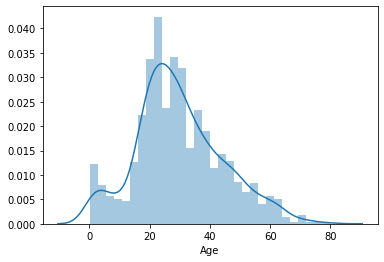

In [19]:
sns.distplot(titanic.Age.dropna(),bins=30)

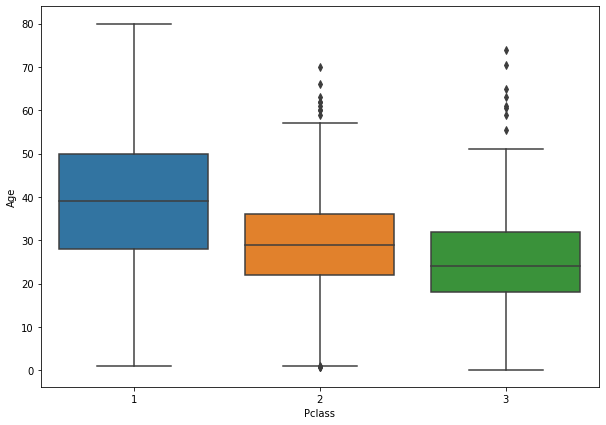

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass",y="Age",data=titanic)
plt.show()

In [21]:
titanic.groupby('Pclass').median()["Age"]

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [22]:
titanic.groupby('Pclass').median()["Age"][1]

39.0

In [23]:
Pclass1age=titanic.groupby('Pclass').median()["Age"][1]
Pclass2age=titanic.groupby('Pclass').median()["Age"][2]
Pclass3age=titanic.groupby('Pclass').median()["Age"][3]
print(Pclass1age,Pclass2age,Pclass3age)

39.0 29.0 24.0


In [24]:
titanic.loc[titanic.Pclass==1,"Age"]=titanic.loc[titanic.Pclass==1,"Age"].fillna(Pclass1age)
titanic.loc[titanic.Pclass==2,"Age"]=titanic.loc[titanic.Pclass==2,"Age"].fillna(Pclass2age)
titanic.loc[titanic.Pclass==3,"Age"]=titanic.loc[titanic.Pclass==3,"Age"].fillna(Pclass3age)

In [25]:
titanic.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [26]:
titanic.loc[titanic.Survived.isnull(),]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,NaN,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,NaN,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,NaN,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,NaN,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


In [27]:
titanic.loc[titanic.Survived.notnull(),]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0.0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [28]:
pd.get_dummies(titanic.Sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [29]:
sex=pd.get_dummies(titanic.Sex,drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [30]:
emb=pd.get_dummies(titanic.Embarked,drop_first=True)
emb.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [31]:
titanic=pd.concat([titanic,sex,emb],axis=1)
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [32]:
titanic.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

In [33]:
titanic.tail(3)

,Survived,Age,SibSp,Parch,Fare,male,Q,S
415,NaN,38.5,0,0,7.2500,1,0,1
416,NaN,24.0,0,0,8.0500,1,0,1
417,NaN,24.0,1,1,22.3583,1,0,0


In [34]:
titanicTrain=titanic.loc[titanic.Survived.notnull(),]
titanicTrain.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S
0,0.0,22.0,1,0,7.2500,1,0,1
1,1.0,38.0,1,0,71.2833,0,0,0
2,1.0,26.0,0,0,7.9250,0,0,1
3,1.0,35.0,1,0,53.1000,0,0,1
4,0.0,35.0,0,0,8.0500,1,0,1


In [35]:
titanicUnknown=titanic.loc[titanic.Survived.isnull(),]
titanicUnknown.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S
0,NaN,34.5,0,0,7.8292,1,1,0
1,NaN,47.0,1,0,7.0000,0,0,1
2,NaN,62.0,0,0,9.6875,1,1,0
3,NaN,27.0,0,0,8.6625,1,0,1
4,NaN,22.0,1,1,12.2875,0,0,1


In [36]:
titanicUnknown=titanicUnknown.drop(["Survived"],axis=1)
titanicUnknown.head()

,Age,SibSp,Parch,Fare,male,Q,S
0,34.5,0,0,7.8292,1,1,0
1,47.0,1,0,7.0000,0,0,1
2,62.0,0,0,9.6875,1,1,0
3,27.0,0,0,8.6625,1,0,1
4,22.0,1,1,12.2875,0,0,1


In [37]:
titanicTrain.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S
0,0.0,22.0,1,0,7.2500,1,0,1
1,1.0,38.0,1,0,71.2833,0,0,0
2,1.0,26.0,0,0,7.9250,0,0,1
3,1.0,35.0,1,0,53.1000,0,0,1
4,0.0,35.0,0,0,8.0500,1,0,1


In [38]:
# Machine learning
X=titanicTrain.drop(["Survived"],axis=1)
y=titanicTrain.Survived

In [39]:
X.head()

,Age,SibSp,Parch,Fare,male,Q,S
0,22.0,1,0,7.2500,1,0,1
1,38.0,1,0,71.2833,0,0,0
2,26.0,0,0,7.9250,0,0,1
3,35.0,1,0,53.1000,0,0,1
4,35.0,0,0,8.0500,1,0,1


In [40]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
5      0.0
6      0.0
7      0.0
8      1.0
9      1.0
10     1.0
11     1.0
12     0.0
13     0.0
14     0.0
15     1.0
16     0.0
17     1.0
18     0.0
19     1.0
20     0.0
21     1.0
22     1.0
23     1.0
24     0.0
25     1.0
26     0.0
27     0.0
28     1.0
29     0.0
      ... 
861    0.0
862    1.0
863    0.0
864    0.0
865    1.0
866    1.0
867    0.0
868    0.0
869    1.0
870    0.0
871    1.0
872    0.0
873    0.0
874    1.0
875    1.0
876    0.0
877    0.0
878    0.0
879    1.0
880    1.0
881    0.0
882    0.0
883    0.0
884    0.0
885    0.0
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [43]:
X_train.shape

(623, 7)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
bhamodel=LogisticRegression()

In [46]:
bhamodel.fit(X_train,y_train)

/home/bharath/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
bhamodel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
bhamodel.score(X_test,y_test)

0.8059701492537313

In [49]:
output=bhamodel.predict(titanicUnknown)

In [50]:
final=pd.DataFrame({"PassengerId":df2.PassengerId,"Survived":output})

In [51]:
final

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
5,897,0.0
6,898,1.0
7,899,0.0
8,900,1.0
9,901,0.0


In [52]:
final.to_csv("bharathTitanicPython.csv",index=None,header=True)

In [53]:
X.corr()

,Age,SibSp,Parch,Fare,male,Q,S
Age,1.000000,-0.244183,-0.172704,0.126256,0.078710,-0.082939,0.014638
SibSp,-0.244183,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.068734
Parch,-0.172704,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.060814
Fare,0.126256,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.162184
male,0.078710,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.119224
Q,-0.082939,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.499421
S,0.014638,0.068734,0.060814,-0.162184,0.119224,-0.499421,1.000000


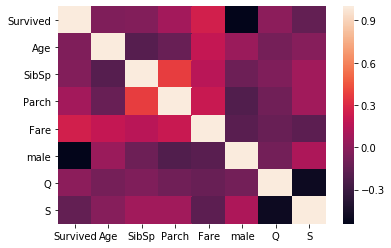

In [54]:
sns.heatmap(titanic.corr())

In [55]:
pout=bhamodel.predict(X_test)
pout

array([1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [56]:
y_test

419    0.0
540    1.0
317    0.0
243    0.0
622    1.0
525    0.0
468    0.0
591    1.0
402    0.0
306    1.0
248    1.0
48     0.0
516    1.0
886    0.0
71     0.0
295    0.0
208    1.0
375    1.0
110    0.0
90     0.0
360    0.0
425    0.0
352    0.0
141    1.0
444    1.0
225    0.0
78     1.0
85     1.0
870    0.0
486    1.0
      ... 
829    1.0
325    1.0
526    1.0
70     0.0
496    1.0
666    0.0
192    1.0
25     1.0
98     1.0
147    0.0
289    1.0
635    1.0
479    1.0
696    0.0
428    0.0
840    0.0
420    0.0
30     0.0
625    0.0
77     0.0
873    0.0
318    1.0
204    1.0
58     1.0
880    1.0
47     1.0
791    0.0
763    1.0
34     0.0
377    0.0
Name: Survived, Length: 268, dtype: float64

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
confusion_matrix(y_test, pout)

array([[148,  21],
       [ 31,  68]])

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
bhaK = KNeighborsClassifier(n_neighbors=1)

In [61]:
bhaK.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [62]:
bhaK.score(X_test,y_test)

0.7052238805970149

In [63]:
acc=[]
for i in range(1,50):
    bhaK=KNeighborsClassifier(n_neighbors=i)
    bhaK.fit(X_train,y_train)
    acc.append(bhaK.score(X_test,y_test))

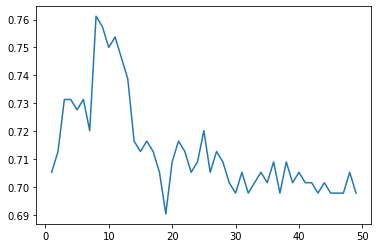

In [64]:
sns.lineplot(range(1,50),acc)

In [65]:
max(acc)

0.7611940298507462

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
TitanicDT=DecisionTreeClassifier()

In [68]:
TitanicDT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
TitanicDT.score(X_test,y_test)

0.7873134328358209

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
TitanicRF=RandomForestClassifier(n_estimators=500)

In [72]:
TitanicRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
TitanicRF.score(X_test,y_test)

0.8134328358208955

In [74]:
from sklearn.tree import plot_tree

[Text(134.80779304979254, 211.7178947368421, 'X[4] <= 0.5\nentropy = 0.476\nsamples = 623\nvalue = [380, 243]'),
 Text(65.01076244813278, 200.2736842105263, 'X[1] <= 2.5\nentropy = 0.39\nsamples = 222\nvalue = [59, 163]'),
 Text(50.74963692946058, 188.82947368421054, 'X[2] <= 3.5\nentropy = 0.351\nsamples = 207\nvalue = [47, 160]'),
 Text(47.97121369294606, 177.38526315789474, 'X[3] <= 10.481\nentropy = 0.325\nsamples = 201\nvalue = [41, 160]'),
 Text(27.78423236514523, 165.94105263157894, 'X[3] <= 8.04\nentropy = 0.499\nsamples = 42\nvalue = [20, 22]'),
 Text(22.22738589211618, 154.49684210526317, 'X[0] <= 27.5\nentropy = 0.475\nsamples = 31\nvalue = [12, 19]'),
 Text(19.448962655601658, 143.05263157894737, 'X[1] <= 0.5\nentropy = 0.452\nsamples = 29\nvalue = [10, 19]'),
 Text(16.670539419087135, 131.60842105263157, 'X[3] <= 7.867\nentropy = 0.436\nsamples = 28\nvalue = [9, 19]'),
 Text(13.892116182572614, 120.16421052631578, 'X[3] <= 7.763\nentropy = 0.483\nsamples = 22\nvalue = [9, 

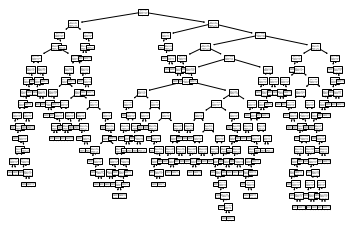

In [75]:
plot_tree(TitanicDT) 

In [76]:
from sklearn.tree import DecisionTreeClassifier
TitanicDT=DecisionTreeClassifier(max_depth=1)
TitanicDT.fit(X_train,y_train)
TitanicDT.score(X_test,y_test)

0.8097014925373134

In [77]:
for i in np.arange(1,15):
    TitanicDT=DecisionTreeClassifier(max_depth=i)
    TitanicDT.fit(X_train,y_train)
    print(TitanicDT.score(X_test,y_test))

0.8097014925373134
0.8059701492537313
0.8171641791044776
0.8208955223880597
0.832089552238806
0.832089552238806
0.8208955223880597
0.8395522388059702
0.8283582089552238
0.7947761194029851
0.8097014925373134
0.7947761194029851
0.7985074626865671
0.7947761194029851


In [78]:
TitanicDT=DecisionTreeClassifier(max_depth=3)
TitanicDT.fit(X_train,y_train)
TitanicDT.score(X_test,y_test)

0.8171641791044776

[Text(167.4, 190.26, 'X[4] <= 0.5\nentropy = 0.476\nsamples = 623\nvalue = [380, 243]'),
 Text(83.7, 135.9, 'X[1] <= 2.5\nentropy = 0.39\nsamples = 222\nvalue = [59, 163]'),
 Text(41.85, 81.53999999999999, 'X[2] <= 3.5\nentropy = 0.351\nsamples = 207\nvalue = [47, 160]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.325\nsamples = 201\nvalue = [41, 160]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(125.55000000000001, 81.53999999999999, 'X[3] <= 166.275\nentropy = 0.32\nsamples = 15\nvalue = [12, 3]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 6.5\nentropy = 0.319\nsamples = 401\nvalue = [321, 80]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 2.5\nentropy = 0.36\nsamples = 17\nvalue = [4, 13]'),
 Text(188.32500000000002, 27.180000000000007, 'entropy = 0.0\nsamples 

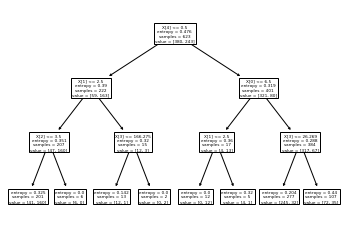

In [79]:
from sklearn.tree import plot_tree
plot_tree(TitanicDT)

In [80]:
from sklearn.model_selection import cross_val_score
TitanicDT=DecisionTreeClassifier(max_depth=3)

In [81]:
scores=cross_val_score(TitanicDT,X,y,cv=10)

In [82]:
scores.mean()

0.8080853478606287